<a href="https://colab.research.google.com/github/stev3j/MachineLearning_Practice/blob/main/fish3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
                9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3], [4,5,6])) # [1,4][2,5][3,6] 식으로 list를 나눔

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))

In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # list 합치기, ones(1이 들어간 리스트), zeros(0 ``)

# 데이터 나누기
train_test_split 함수 이용

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [13]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [15]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [16]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 도미, 빙어 데이터 학습

KNeighborsClassifier (k-최근접 알고리즘) 이용


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# 거리가 먼데도?

In [22]:
print(kn.predict([[25, 150]]))

[0.]


In [23]:
import matplotlib.pyplot as plt

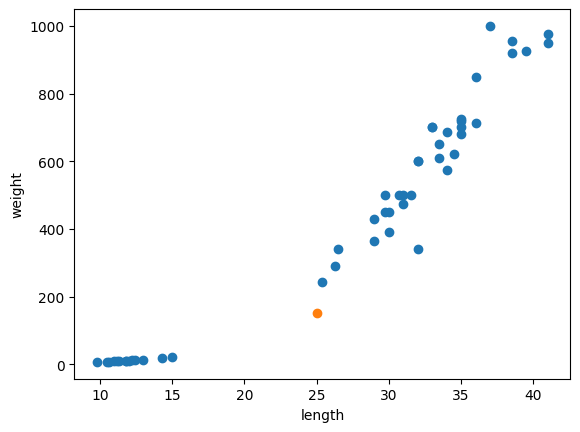

In [27]:
plt.scatter(fish_length, fish_weight)
plt.scatter(25, 150)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

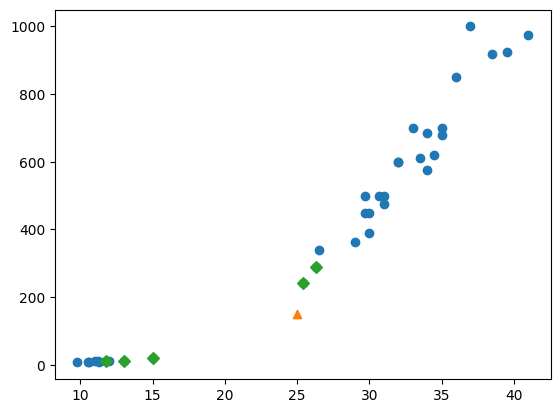

In [28]:
distances, indexes = kn.kneighbors([[25, 150]])  # 이 점과 가까운 점의 '거리'와 '인덱스'를 반환함

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')
plt.show()

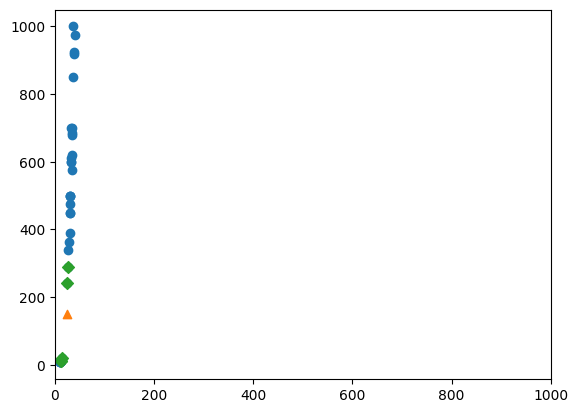

In [29]:
# 세로로 정렬해서 길이를 구하기 때문?

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.show()

# 표준 점수로 계산
거리 계산을 명확히 하기 위해

In [30]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)


In [31]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [32]:
train_scaled = (train_input - mean) / std # train_input을 평균적으로 계산

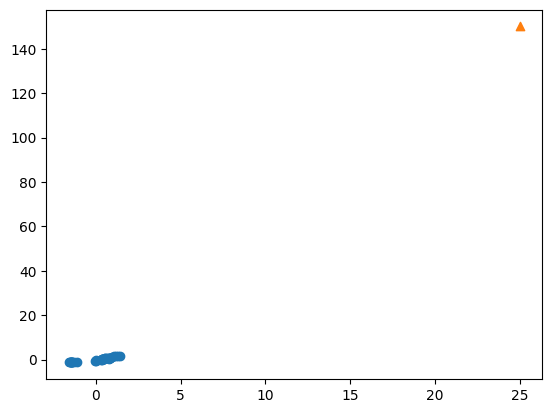

In [34]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.show()

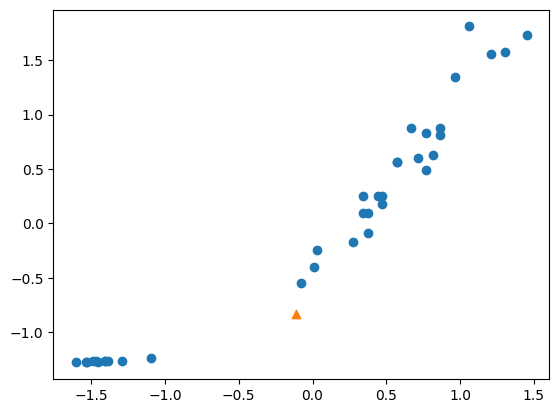

In [37]:
new = ([25, 150] - mean) / std # new(예측하고픈 점)을 표준 점수로 계산

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.show()

In [38]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [39]:
print(kn.predict([new]))

[1.]


In [41]:
distances, indexes = kn.kneighbors([new])

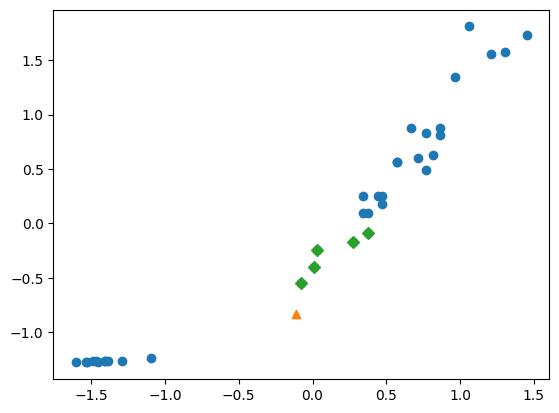

In [45]:
# 표준 점수로 계산하니 출력이 명확히 됨

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker='D')
plt.show()